# Untitled

## P1. Review of Key Functions and Concepts

Of course. Here is a structured guide with concise explanations and
sample data to effectively teach these R concepts for a web scraping
workshop. The goal is to give attendees a clear understanding of what
the code does without getting lost in details.

------------------------------------------------------------------------

### 1. Extracting Items with `pluck` 🤏

`pluck()` from the `purrr` package is for safely pulling out a single
piece of data from a list or a data frame column that contains lists.

**Fake Data**: Imagine you scraped data and have a list of authors for
each book.

In [ ]:
library(tibble)
library(purrr)

book_data <- tibble(
  title = c("The Hobbit", "Dune"),
  details = list(
    list(author = "Tolkien", year = 1937),
    list(author = "Herbert", year = 1965)
  )
)

# book_data
#> # A tibble: 2 × 2
#>   title      details
#>   <chr>      <list>
#> 1 The Hobbit <list [2]>
#> 2 Dune       <list [2]>

**Code Demo**: Let’s “pluck” the author from the first book’s details.

In [ ]:
# Get the 'author' from the first element of the 'details' column
pluck(book_data, "details", 1, "author")
#> [1] "Tolkien"

This is like telling R: go into `book_data`, find the `details` column,
go to its `first` element, and grab the value named `author`.

------------------------------------------------------------------------

### 2. Cleaning Data with `janitor` 🧹

The `janitor` package is your best friend for cleaning up messy data.

**Fake Data**: Data scraped from a website often has messy column names
and extra empty spaces.

In [ ]:
library(janitor)

messy_data <- tibble(
  `First Name` = c("gandalf", "frodo", NA),
  `Last Name` = c("the grey", "baggins", NA),
  `AGE` = c("2019", "50", NA)
)

# messy_data
#> # A tibble: 3 × 3
#>   `First Name` `Last Name` `AGE`
#>   <chr>        <chr>       <chr>
#> 1 gandalf      the grey    2019
#> 2 frodo        baggins     50
#> 3 NA           NA          NA

**Code Demos**:

1.  **`clean__names()`** makes column names neat and consistent
    (snake_case).

In [ ]:
cleaned_data <- clean_names(messy_data)     # colnames(cleaned_data)     
#> [1] "first_name" "last_name"  "age"

1.  **`remove_empty()`** gets rid of empty rows or columns.

In [ ]:
# The third row is empty, so it gets removed     
remove_empty(cleaned_data, which = "rows")     #> # A tibble: 2 × 3     #>   first_name last_name age     #>   <chr>      <chr>     <chr>     #> 1 gandalf    the grey  2019     #> 2 frodo      baggins   50

1.  **`adorn_totals()`** is powerful for quickly adding sums.

In [ ]:
# Let's use a numeric data frame     
sales <- tibble(         product = c("A", "B"),         q1_sales = c(100, 200),         q2_sales = c(150, 250)     )     adorn_totals(sales, where = "row")     #>  product q1_sales q2_sales     #>        A      100      150     #>        B      200      250     #>    Total      300      400

------------------------------------------------------------------------

### 3. Simple Renaming with `rename` ✍️

The `rename()` function from `dplyr` is the most direct way to rename
one or more specific columns. The pattern is always
**`new_name = old_name`**.

**Fake Data**: Let’s use our cleaned data from before.

In [ ]:
library(dplyr)

#> # A tibble: 3 × 3
#>   first_name last_name age
#>   <chr>      <chr>     <chr>
#> 1 gandalf    the grey  2019
#> 2 frodo      baggins   50
#> 3 NA         NA        NA

**Code Demo**: Let’s change `age` to `character_age`.

In [ ]:
cleaned_data %>%
  rename(character_age = age)

#> # A tibble: 3 × 3
#>   first_name last_name character_age
#>   <chr>      <chr>     <chr>
#> 1 gandalf    the grey  2019
#> 2 frodo      baggins   50
#> 3 NA         NA        NA

------------------------------------------------------------------------

### 4. Advanced Renaming with `rename_with` 🔁

`rename_with()` is for changing many column names at once using a
**pattern**. It’s perfect when you want to apply the same rule to
multiple columns.

**Fake Data**: Imagine your scraped data has a weird prefix on several
columns.

In [ ]:
data_with_prefix <- tibble(
  `_name` = c("Aragorn", "Legolas"),
  `_race` = c("Human", "Elf"),
  `id` = c(1, 2)
)

**Code Demo**: Let’s remove the leading underscore `_` from every column
that starts with one.

In [ ]:
library(stringr)

data_with_prefix %>%
  rename_with(~ str_replace(., "^_", ""), .cols = starts_with("_"))

#> # A tibble: 2 × 3
#>   name    race    id
#>   <chr>   <chr>  <dbl>
#> 1 Aragorn Human      1
#> 2 Legolas Elf        2

-   `rename_with(...)`: “I want to rename some columns.”
-   `~ str_replace(., "^_", "")`: The rule is to replace a `^` (start of
    the text) followed by `_` with nothing (`""`). The `.` is a
    placeholder for the column name.
-   `.cols = starts_with("_")`: “Only apply this rule to columns that
    start with `_`.”

------------------------------------------------------------------------

### 5. Selecting Columns with `!` and `:` 🎯

You can use `select()` from `dplyr` to keep or remove columns.

-   `:` (colon) selects a **range of columns**.
-   `!` (bang) **removes** a column.

**Fake Data**:

In [ ]:
character_stats <- tibble(
  name = c("Gimli", "Samwise"),
  race = c("Dwarf", "Hobbit"),
  weapon = c("Axe", "Frying Pan"),
  age = c(139, 33)
)

**Code Demos**:

In [ ]:
# 1. Select all columns FROM 'race' TO 'weapon'
character_stats %>% select(race:weapon)
#> # A tibble: 2 × 2
#>   race   weapon
#>   <chr>  <chr>
#> 1 Dwarf  Axe
#> 2 Hobbit Frying Pan

# 2. Select everything EXCEPT the 'age' column
character_stats %>% select(!age)
#> # A tibble: 2 × 3
#>   name    race   weapon
#>   <chr>   <chr>  <chr>
#> 1 Gimli   Dwarf  Axe
#> 2 Samwise Hobbit Frying Pan

------------------------------------------------------------------------

### 6. Understanding Regular Expressions (`regex`) 🧐

A **regular expression** (or regex) is a pattern used to find and match
text. It looks weird, but it’s just a set of rules.

Let’s break down this regex for finding numbers:
`^\\s*-?\\d*\\.?\\d+\\s*$`

| Part     | Meaning                                   | Example Matches |
|:---------|:------------------------------------------|:----------------|
| `^`      | Start of the string                       |                 |
| `\\s*`   | Zero or more whitespace characters (`\s`) | (space)         |
| `-?`     | An optional hyphen (`-`)                  | `-`             |
| `\\d*`   | Zero or more digits (`\d`)                | `123`, \`\`     |
| `\\.?`   | An optional literal dot (\`.\`)           | \`.\`           |
| \`\d+\`  | **One** or more digits (\`\d\`)           | \`45\`, \`6\`   |
| \`\s\*\` | Zero or more whitespace characters        | \` \` (space)   |
| \`\$\`   | End of the string                         |                 |

**In English**: This pattern looks for strings that **start** (`^`),
might have some spaces (`\s*`), might have a minus sign (`-?`), might
have some digits (`\d*`), might have a decimal point (`\.?`), must have
at least one digit (`\d+`), might have more spaces (`\s*`), and then
must **end** (`$`).

This pattern will match `"5"`, `" -10.5 "`, and `".5"` but will **not**
match `"5a"`, `"-$5"`, or `"1.2.3"`.

------------------------------------------------------------------------

### 7. `across()` for Mass Changes ⚡️

`across()` is a super-powerful `dplyr` function that lets you apply the
same operation to **multiple columns at once**. It’s almost always used
inside `mutate()`.

**Fake Data**: Scraped data often reads numbers as text.

In [ ]:
scraped_measurements <- tibble(
  id = c("A", "B", "C"),
  width = c("10.5", "8", "9.1"),
  height = c(" 5.2 ", "-3", "7.7"),
  comment = c("ok", "good", "perfect")
)

**Code Demo**: Let’s convert every column that looks like a number into
an actual numeric type. We’ll use the `regex` from before.

In [ ]:
numeric_data <- scraped_measurements %>%
  mutate(across(where(~ all(grepl("^\\s*-?\\d*\\.?\\d+\\s*$", .x))), ~ as.numeric(.)))

# str(numeric_data)
#> tibble [3 × 4] (S3: tbl_df/tbl/data.frame)
#>  $ id     : chr [1:3] "A" "B" "C"
#>  $ width  : num [1:3] 10.5 8 9.1
#>  $ height : num [1:3] 5.2 -3 7.7
#>  $ comment: chr [1:3] "ok" "good" "perfect"

-   `mutate(across(...))`: We are changing columns.
-   `where(~ all(grepl(...)))`: This part **selects the columns**. It
    tests every column (`where`) to see if (`~`) **all** of its values
    match (`grepl`) our numeric `regex` pattern. It finds `width` and
    `height`.
-   `~ as.numeric(.)`: This part is the **action**. It takes the
    selected columns (`.`) and applies the `as.numeric` function to
    them.

------------------------------------------------------------------------

### 8. Conditional Logic with `case_when` 🤔

`case_when()` is for creating a new column based on a set of `if/then`
rules. It’s much easier to read than nested `ifelse()` statements. The
syntax is **`condition ~ value`**.

**Fake Data**: Let’s use the numeric data we just created.

In [ ]:
numeric_data
#> # A tibble: 3 × 4
#>   id    width height comment
#>   <chr> <dbl>  <dbl> <chr>
#> 1 A      10.5    5.2 ok
#> 2 B       8     -3   good
#> 3 C       9.1    7.7 perfect

**Code Demo**: Let’s create a `size_category` based on the `width`
column.

In [ ]:
numeric_data %>%
  mutate(
    size_category = case_when(
      width >= 10   ~ "Large",
      width >= 9    ~ "Medium",
      TRUE          ~ "Small"
    )
  )

#> # A tibble: 3 × 5
#>   id    width height comment size_category
#>   <chr> <dbl>  <dbl> <chr>   <chr>
#> 1 A      10.5    5.2 ok      Large
#> 2 B       8     -3   good    Small
#> 3 C       9.1    7.7 perfect Medium

-   `case_when()` checks each rule in order. The first one that is
    `TRUE` wins.
-   `width >= 10 ~ "Large"`: If width is 10 or more, the value is
    “Large”.
-   `width >= 9 ~ "Medium"`: If not, but width is 9 or more, it’s
    “Medium”.
-   `TRUE ~ "Small"`: This is the catch-all. If none of the above rules
    were met, the value is “Small”. `TRUE` always evaluates to true, so
    it works like an `else` statement.

## P2. HTML Concepts

### How HTML Builds a Web Page

To understand web scraping, we first need to see how a web browser reads
HTML code to display a page.

#### 1. The Rendered Page (What You See)

This is the final, visual webpage that you interact with in a browser.
It’s designed to be human-readable.

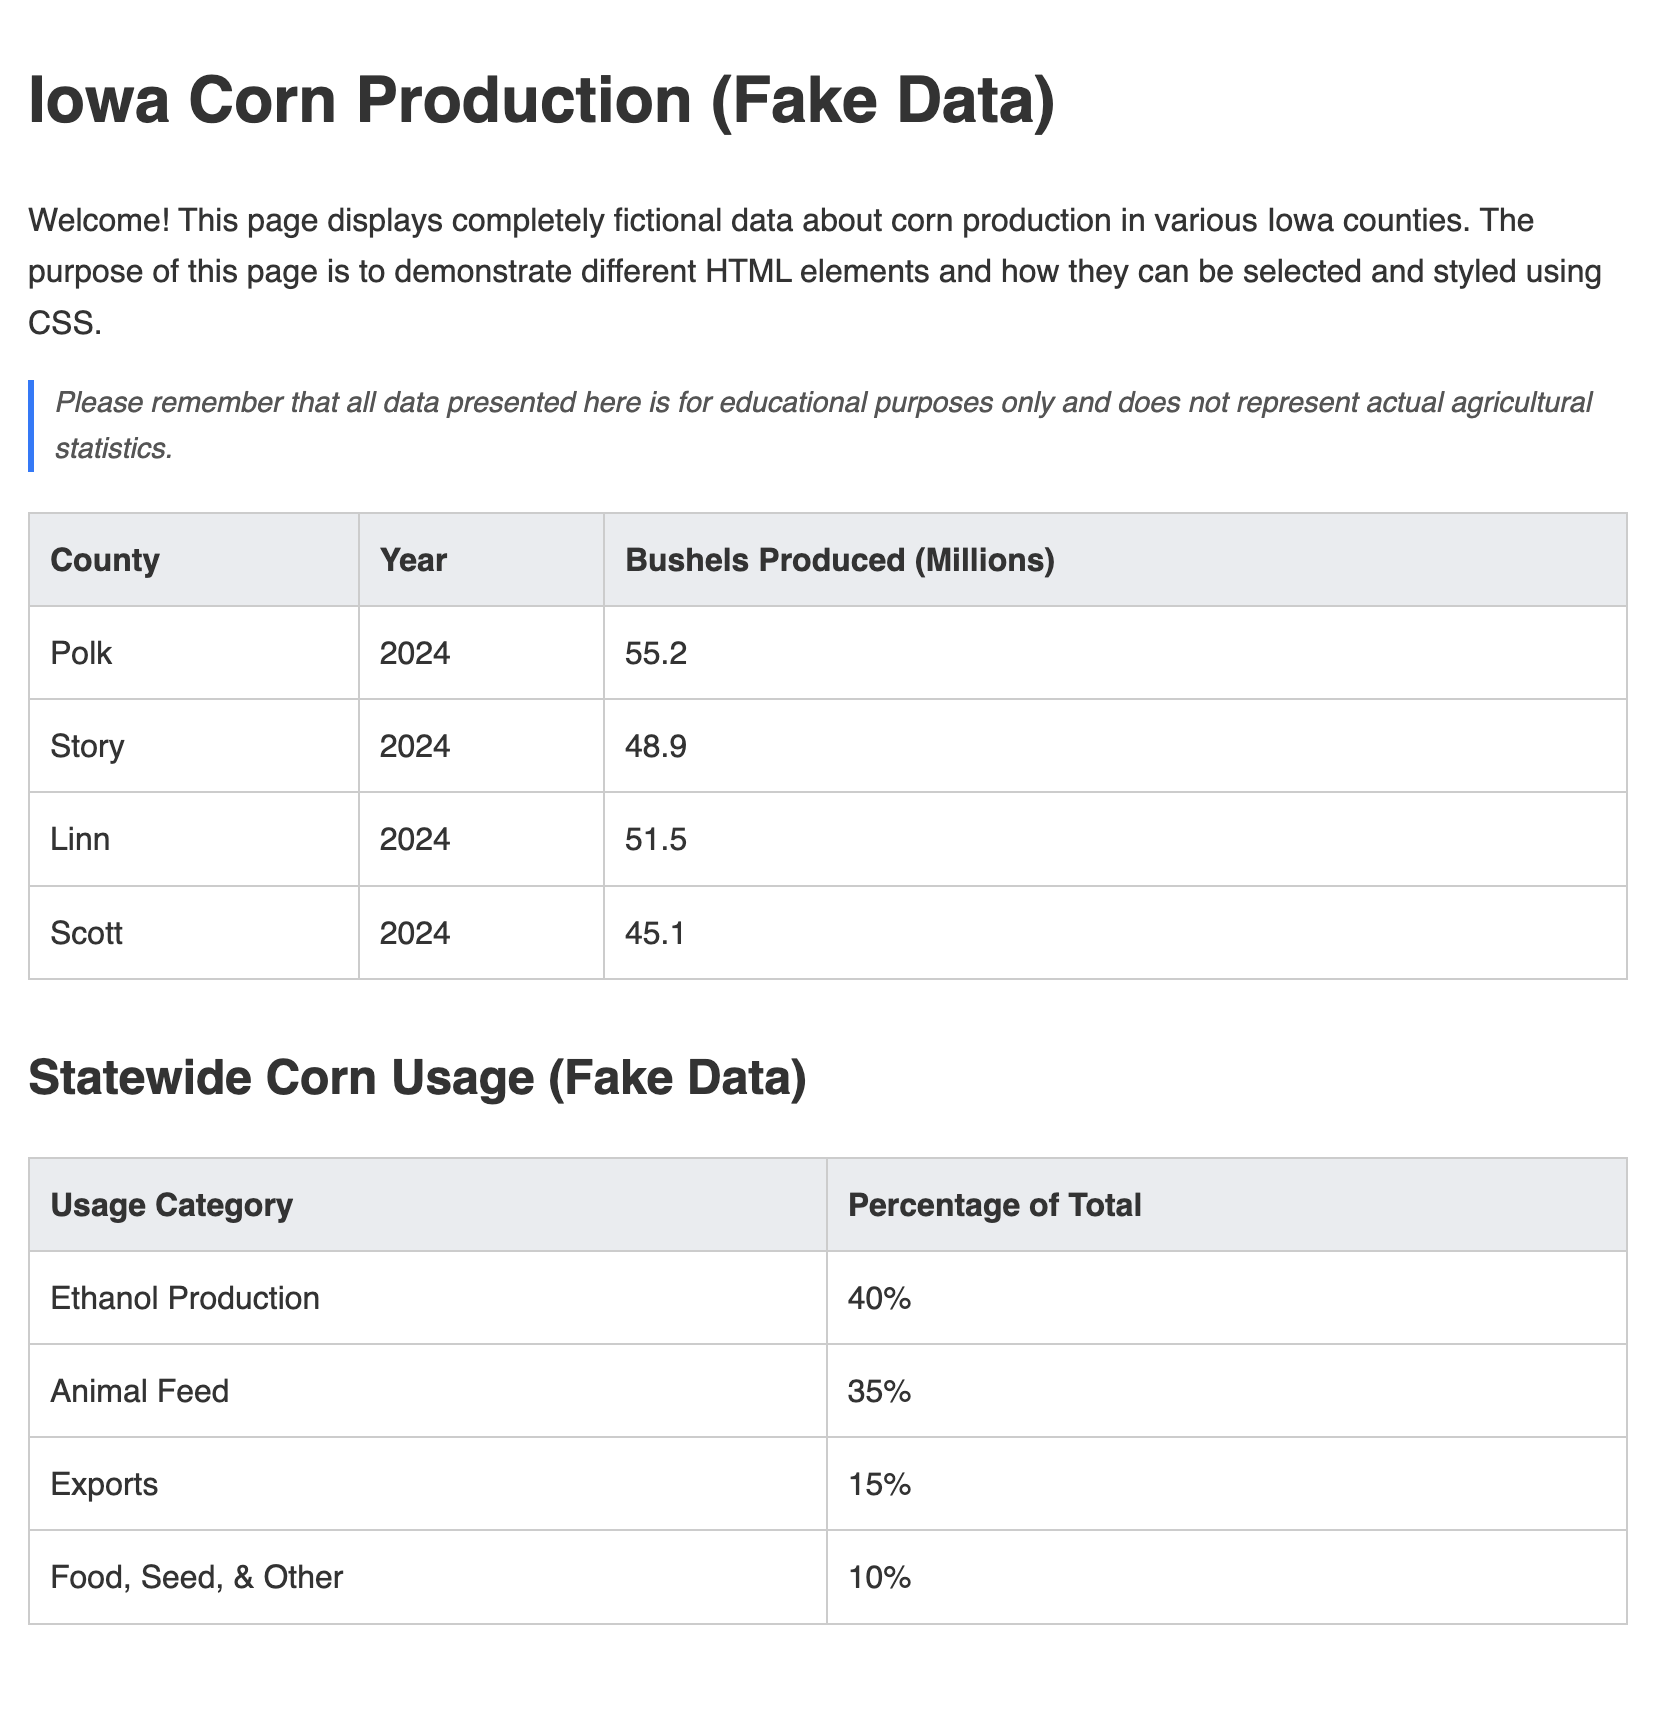

#### 2. The HTML Code (What the Computer Sees)

Behind every webpage is the raw HTML code. This code acts as the
blueprint, telling the browser what content to display and how to
structure it.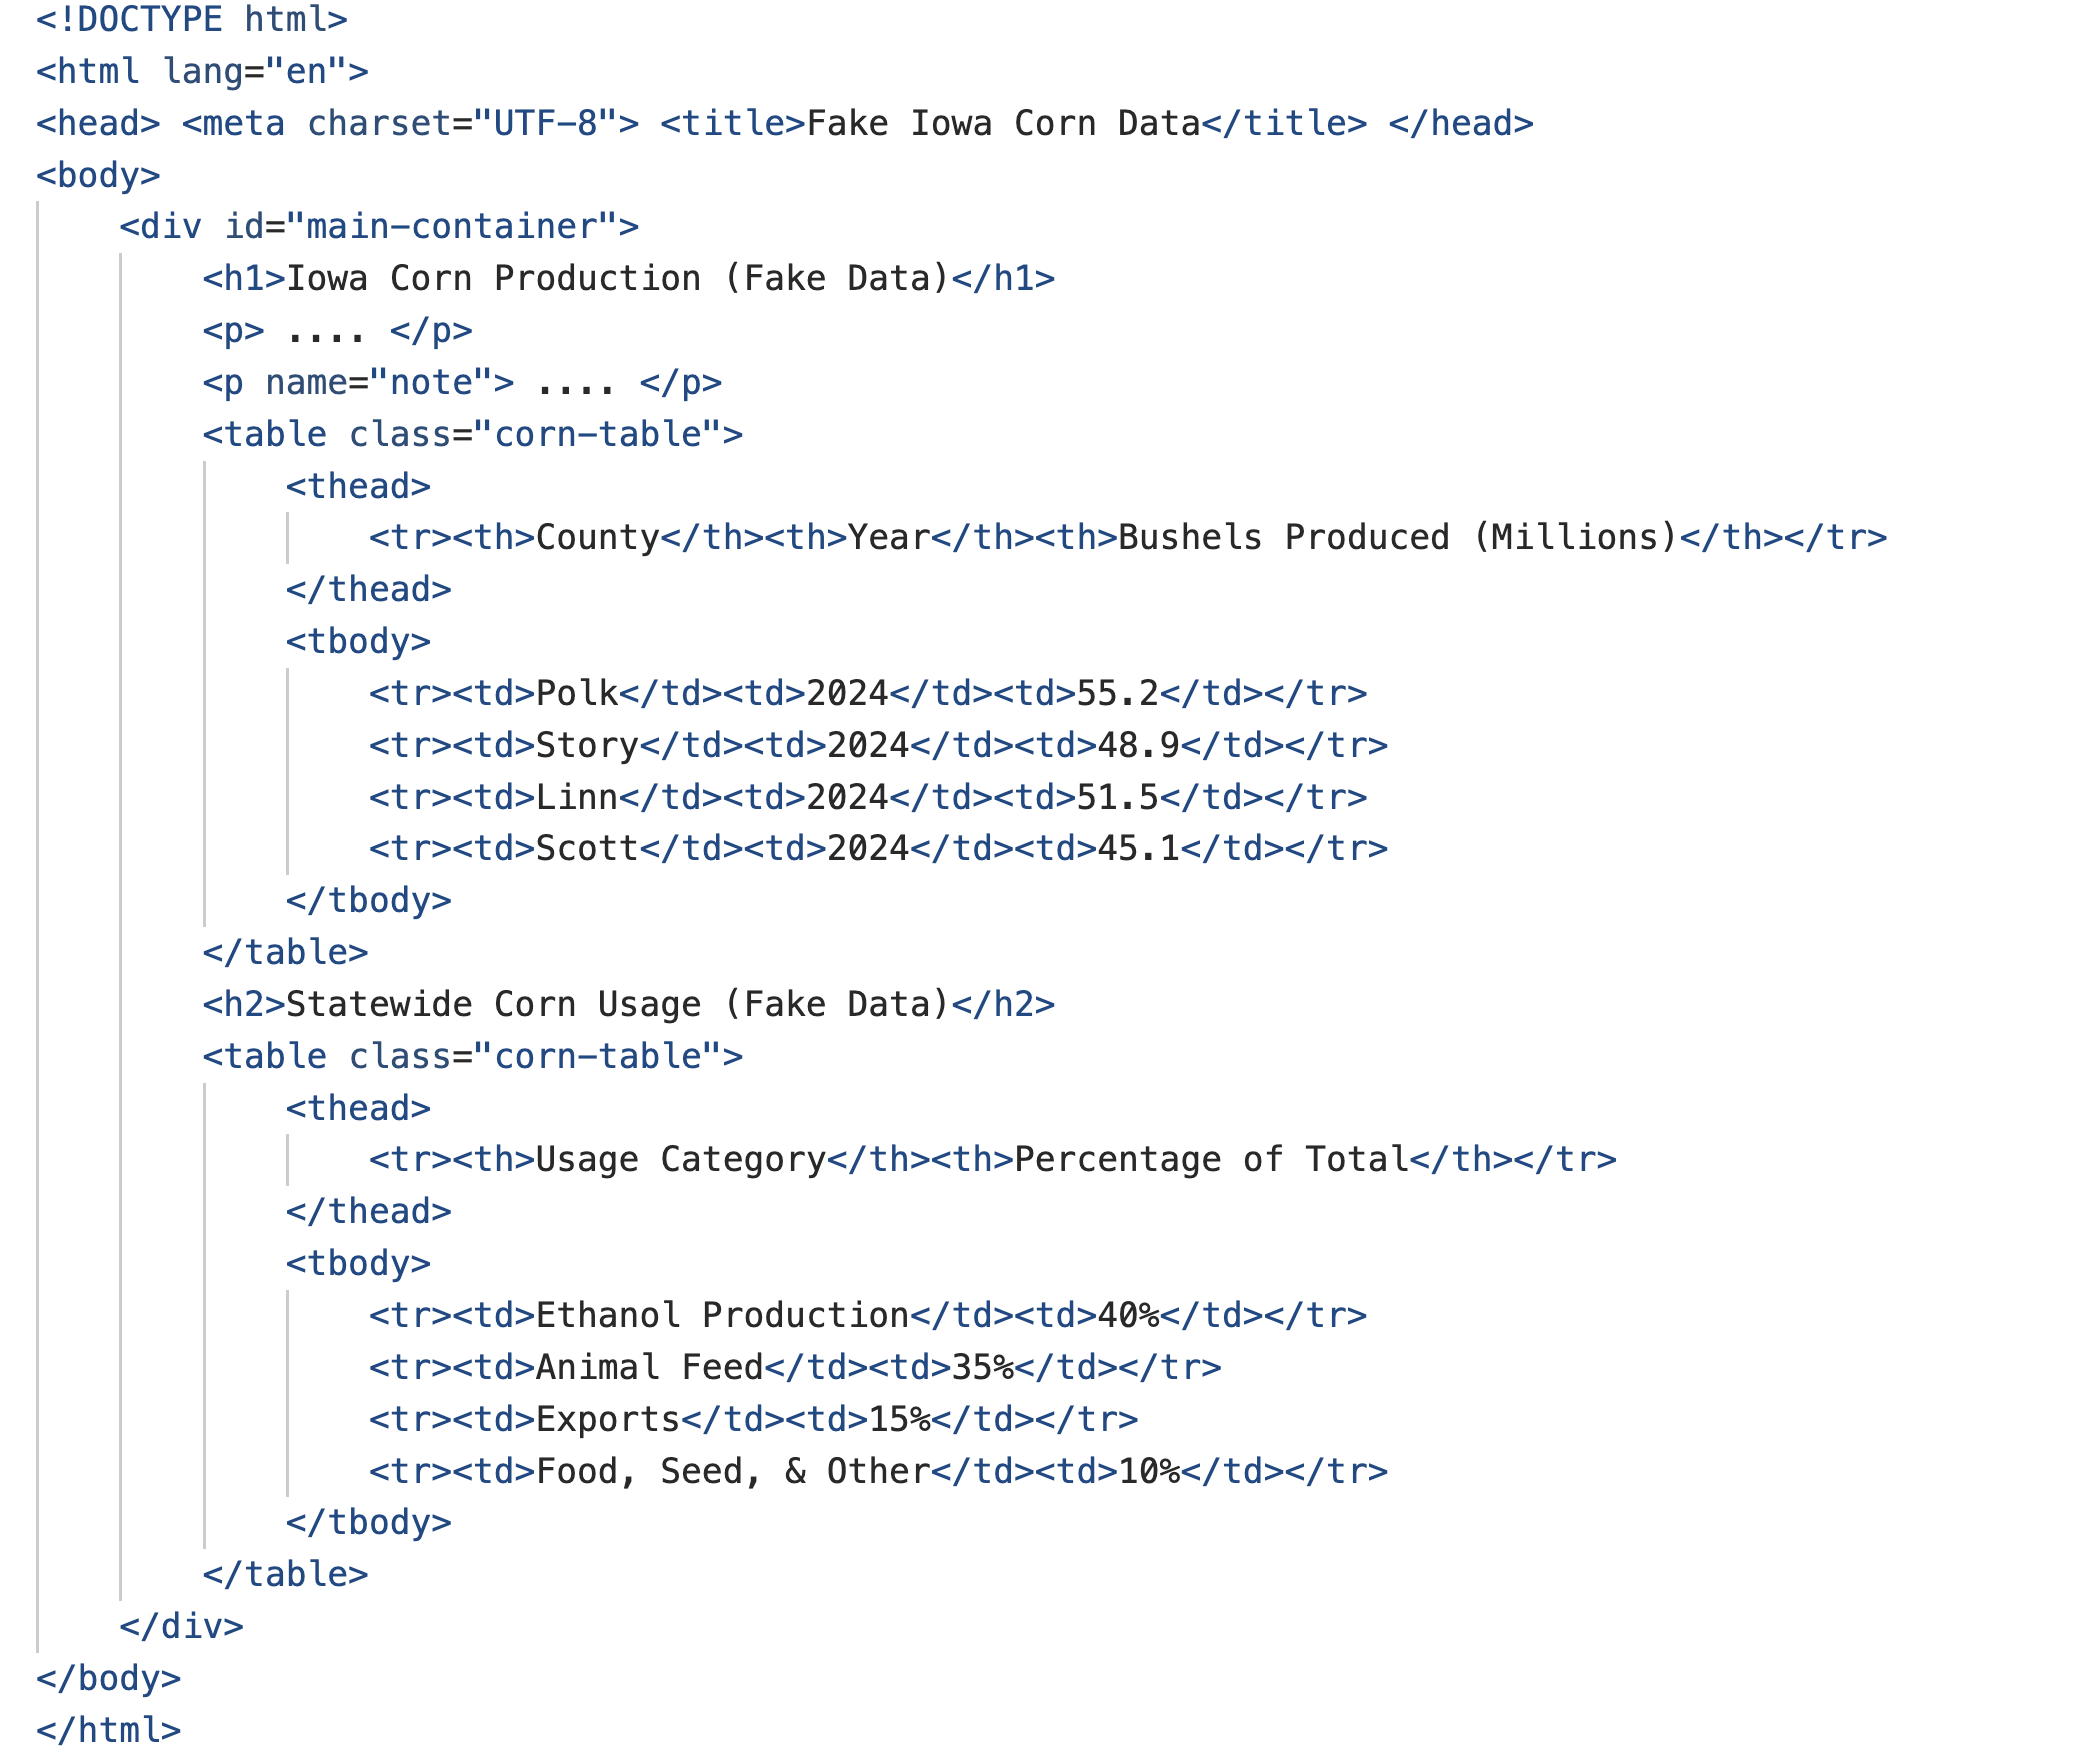

### Finding a Specific Element: The Table

Let’s focus on a specific part of the page: the data tables.

#### 1. The Tables on the Rendered Page

When we scrape, our goal is to extract specific information, like the
data in these two tables.

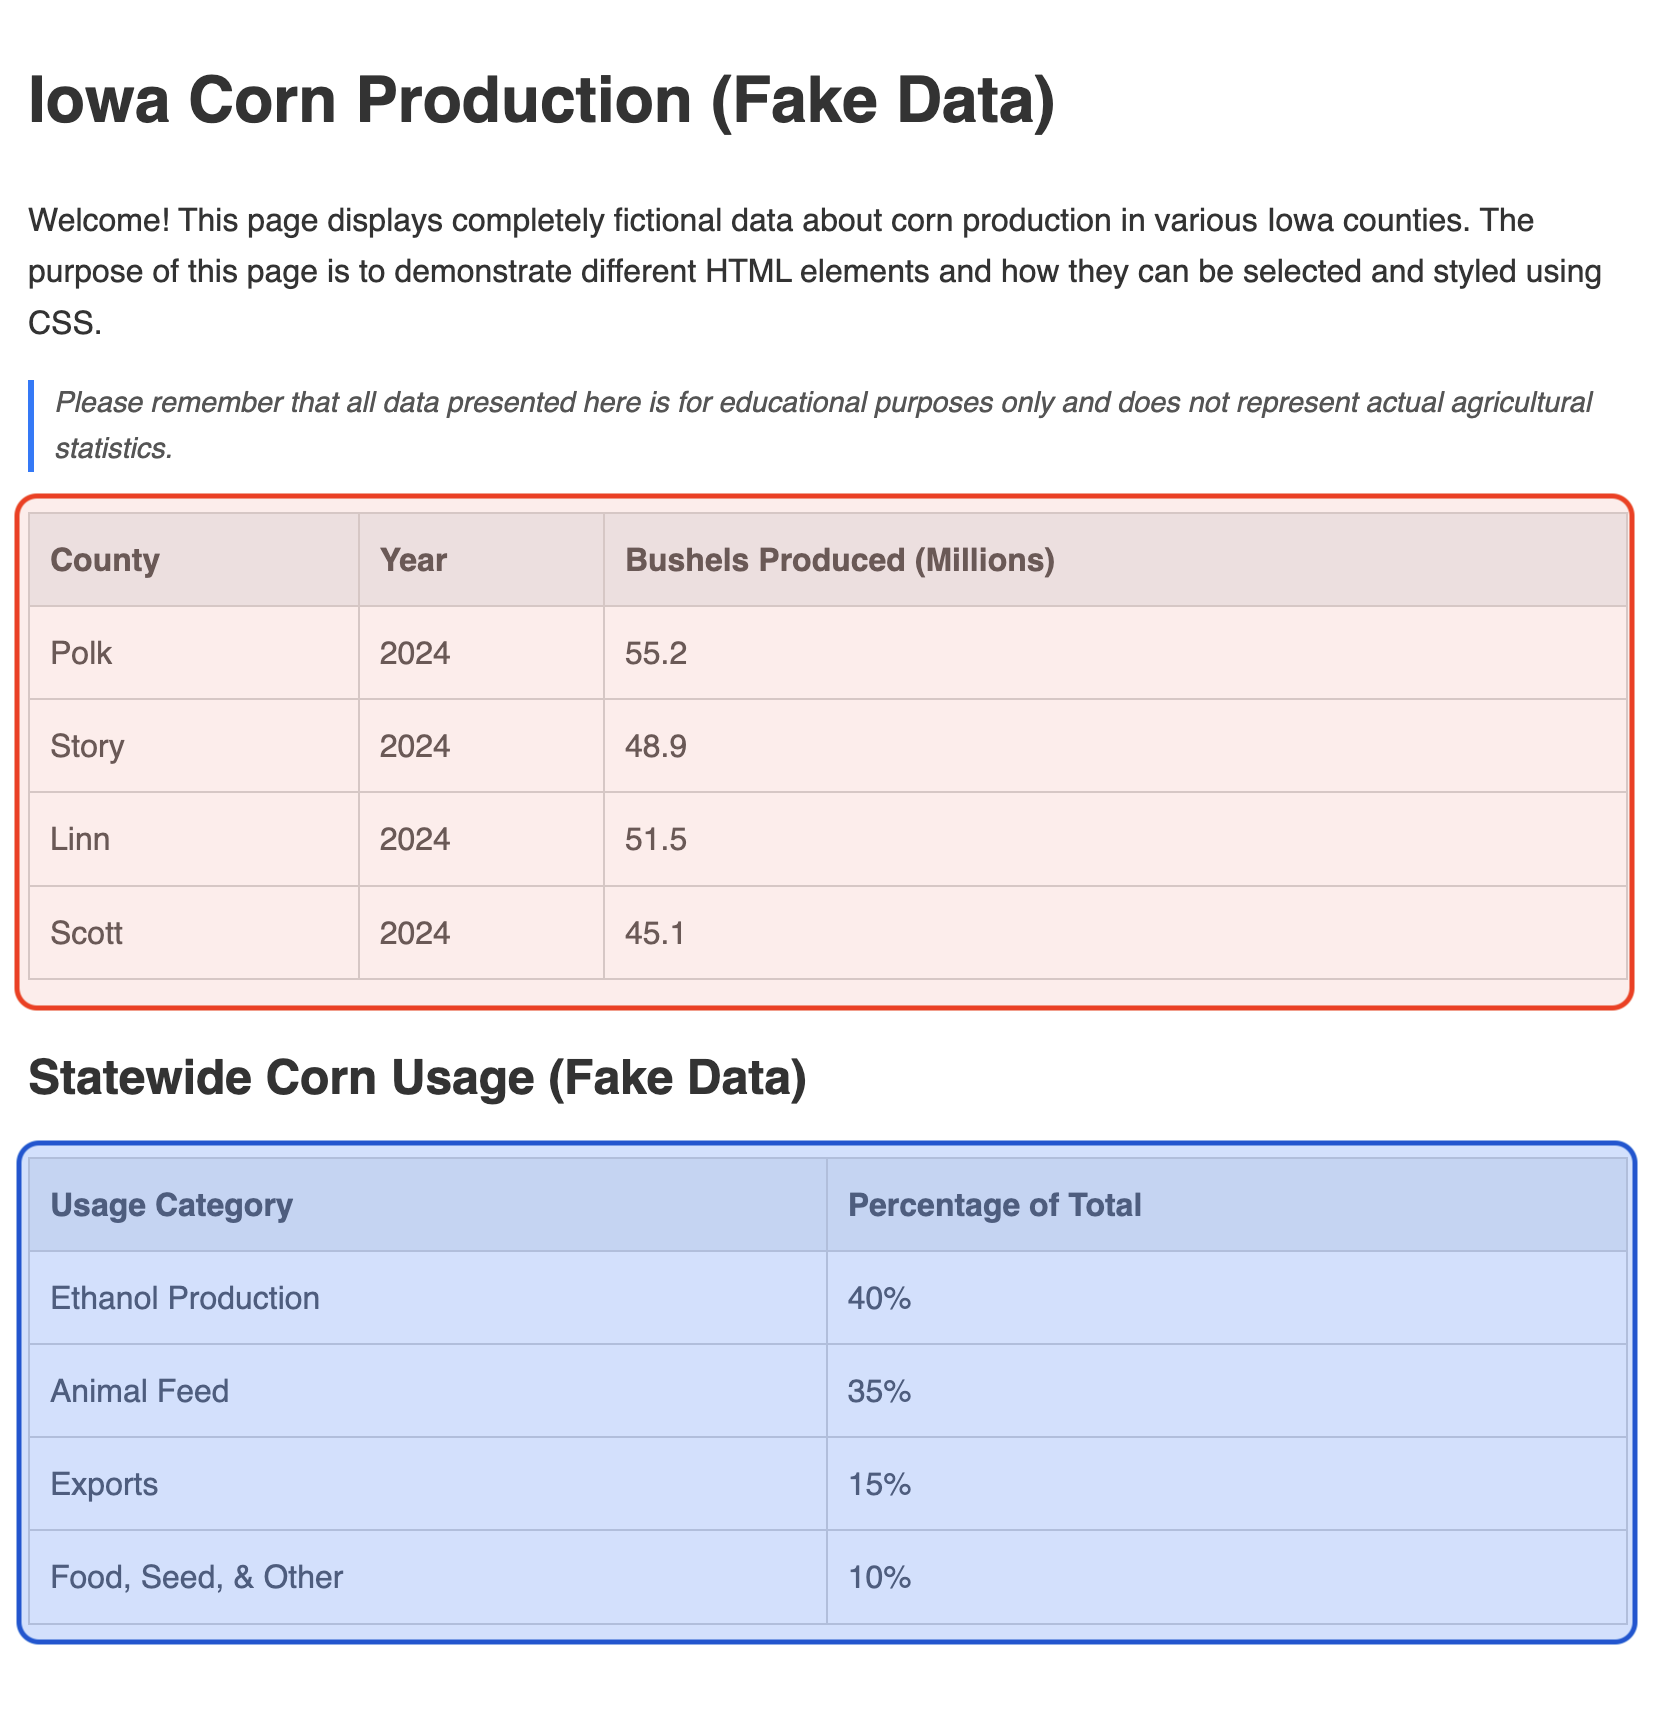

#### 2. The `<table>` Tags in the HTML Code

To extract those tables, we need to find the code that creates them. In
HTML, tables are defined by `<table>` tags, which contain all the data
and structure for a specific table.

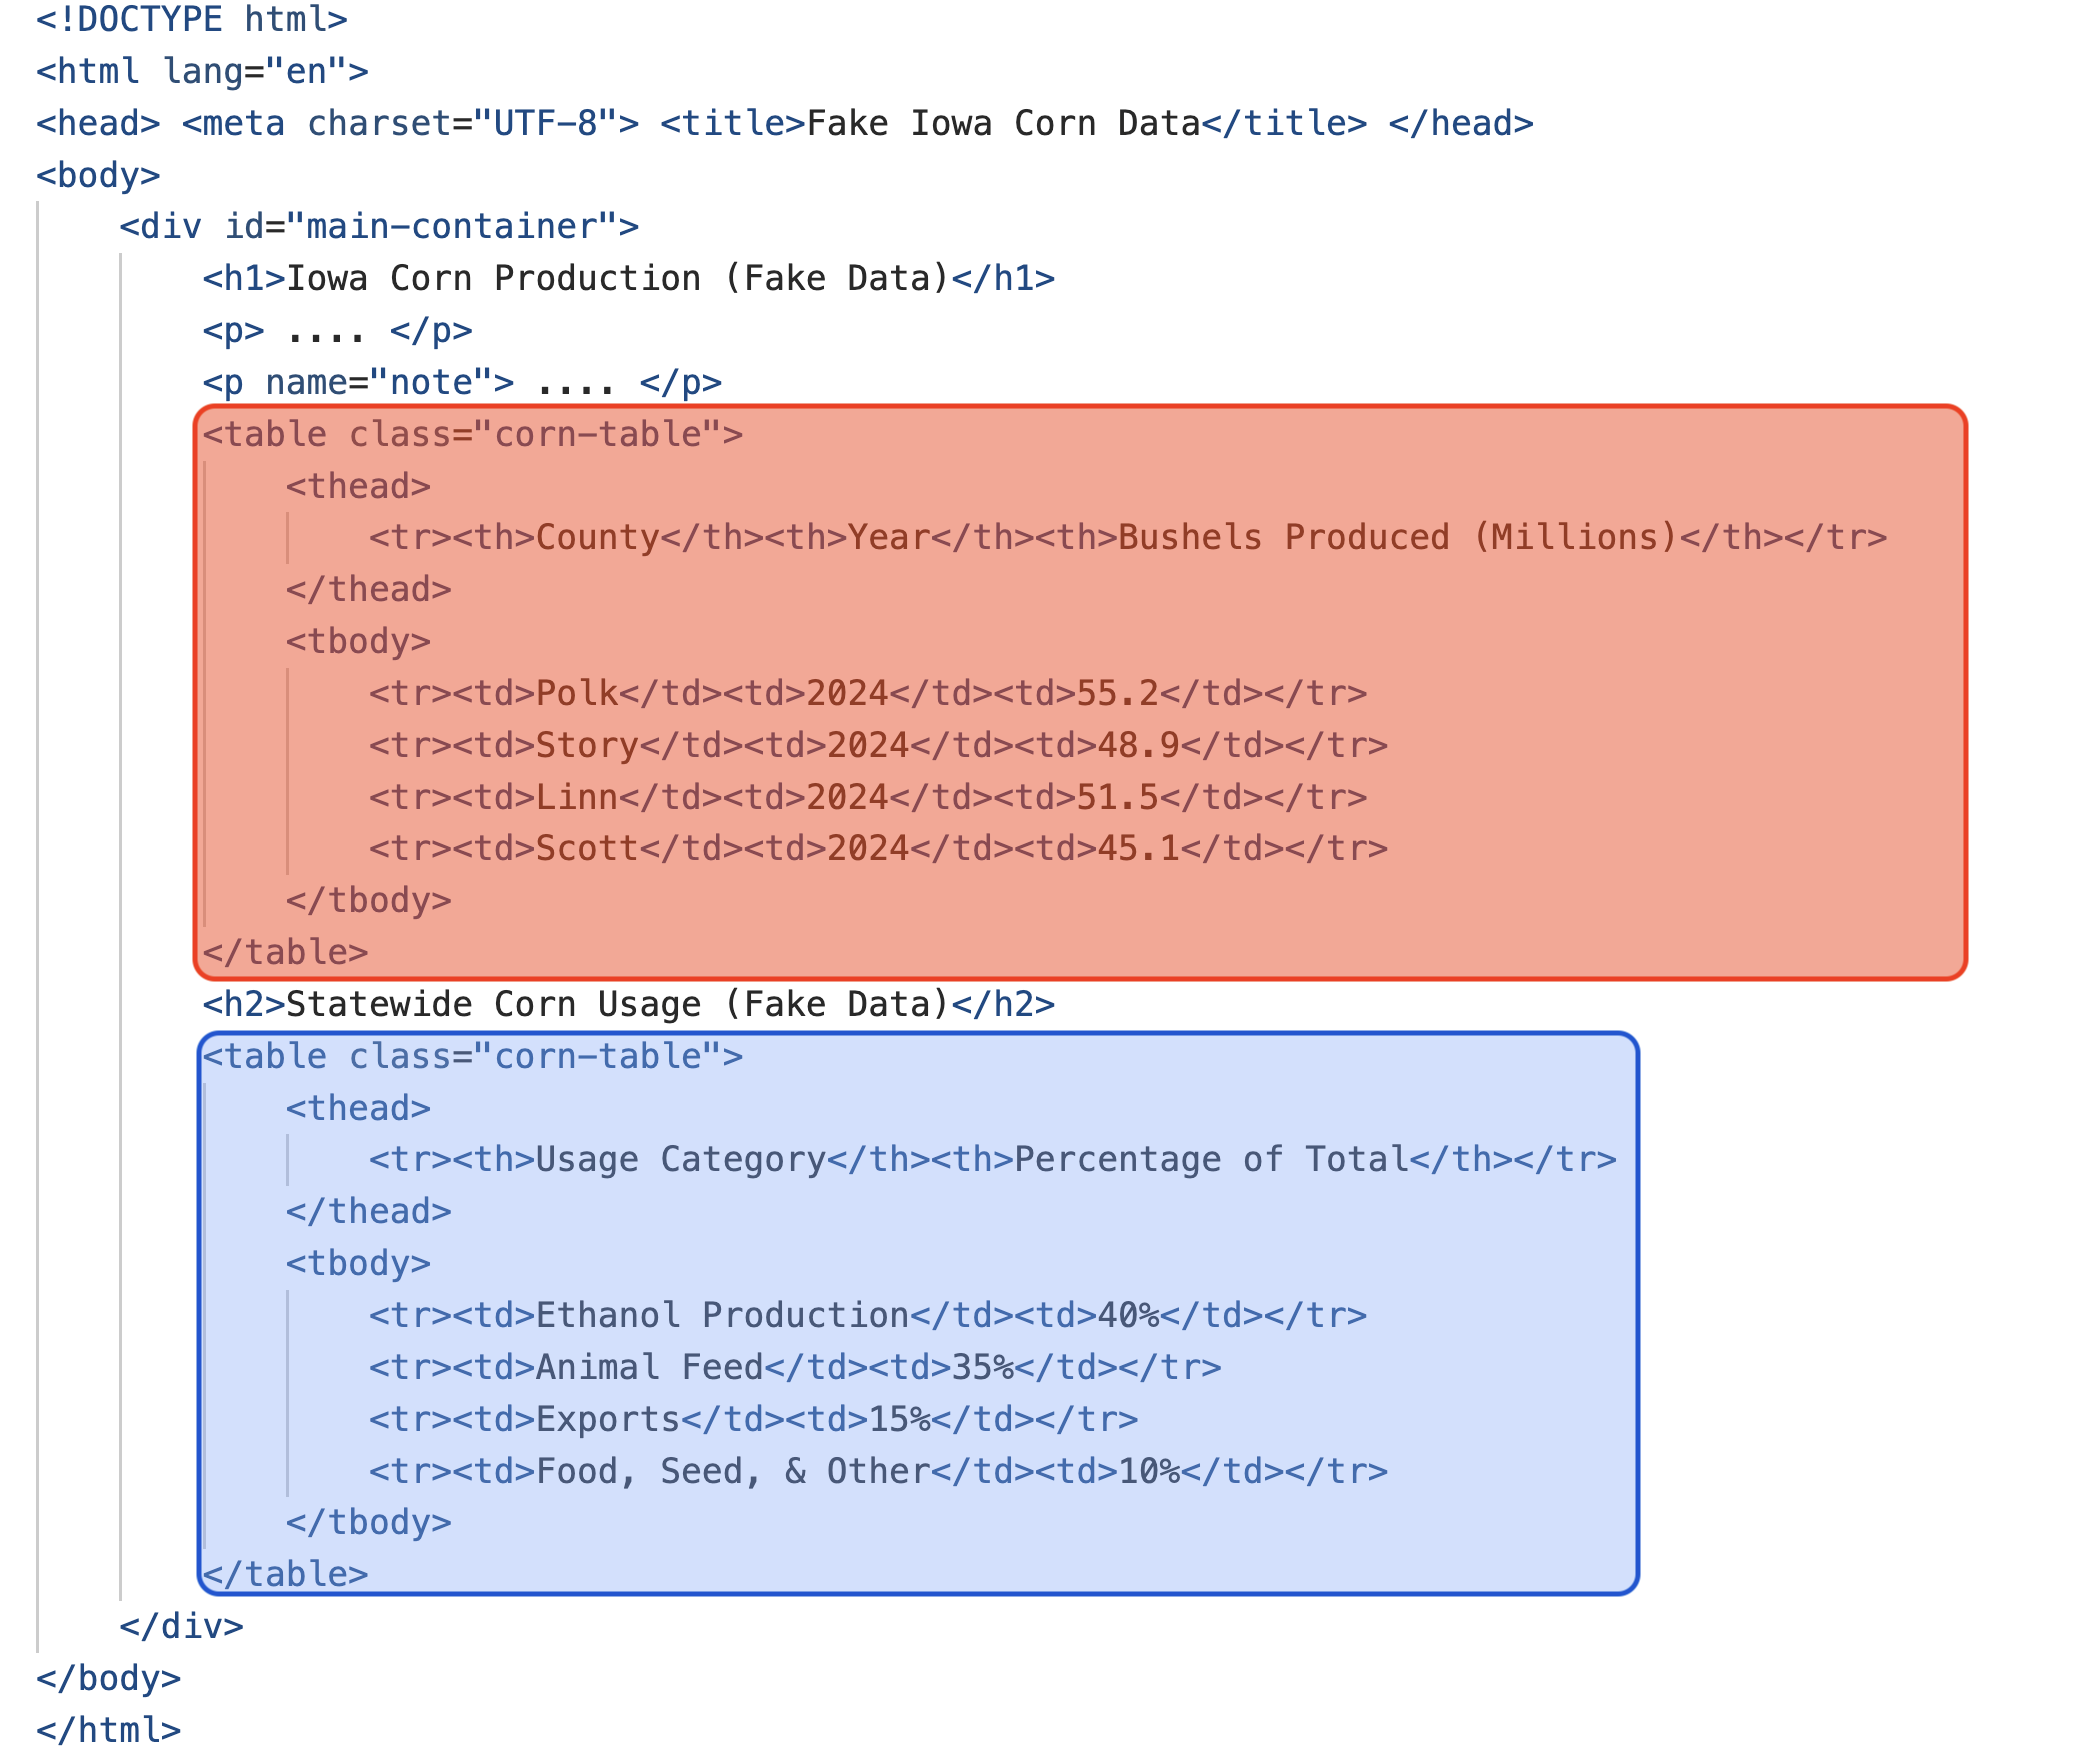

------------------------------------------------------------------------

### Anatomy of an HTML Table

An HTML table is built from a set of nested tags that define its
structure and content.

-   `<table></table>` This tag is the main container that wraps around
    all the content for an entire table.

-   `<thead></thead>` This tag defines the header section of a table,
    where you place the row containing the column titles.

-   `<th></th>` A **t**able **h**eader cell, used for column titles.
    Text inside a `<th>` tag is typically bold and centered by default.

-   `<tr></tr>` A **t**able **r**ow, which groups together all the cells
    (`<th>` or `<td>`) that belong in a single horizontal line.

-   `<td></td>` A **t**able **d**ata cell, which contains the individual
    pieces of data in the table’s body.

## P3. Desired `rvest` functions

### P_sub_1: Reading the HTML File

First, we load our libraries and read the HTML file into an R object.
This step remains the same.

In [ ]:
library(rvest)
library(purrr)
library(here)


# Read the local HTML file into an R object
iowa_html_page <-  here("sessions","session_3","fake_iowa_data.html") %>% 
  read_html()

### P_sub_2: Extracting the First Table with `pluck()`

Instead of using `[[1]]`, we can pipe the output of `html_table()`
directly into `pluck()`. We tell `pluck()` to retrieve the **first**
element from the list of tables.

In [ ]:
# Use pluck() to get the first table from the list
production_df <- iowa_html_page  %>% 
  html_table() %>% 
  pluck(1)

print(production_df)

### P_sub_3: Extracting the Second Table with `pluck()`

We can use the exact same process to get the second table. We simply
change the index in `pluck()` from `1` to `2` to retrieve the **second**
element from the list.

In [ ]:
# Use pluck() to get the second table
usage_df <- page %>% 
  html_table() %>% 
  pluck(2)

print(usage_df)

## P4. Extract NFL Data

Let’s go to this html page.

<https://www.pro-football-reference.com/teams/was/2023.htm#games>

Our desired table is the 2023 Regular Season Table for the Washington
Commanders, which is the second table on the webpage.

<figure>
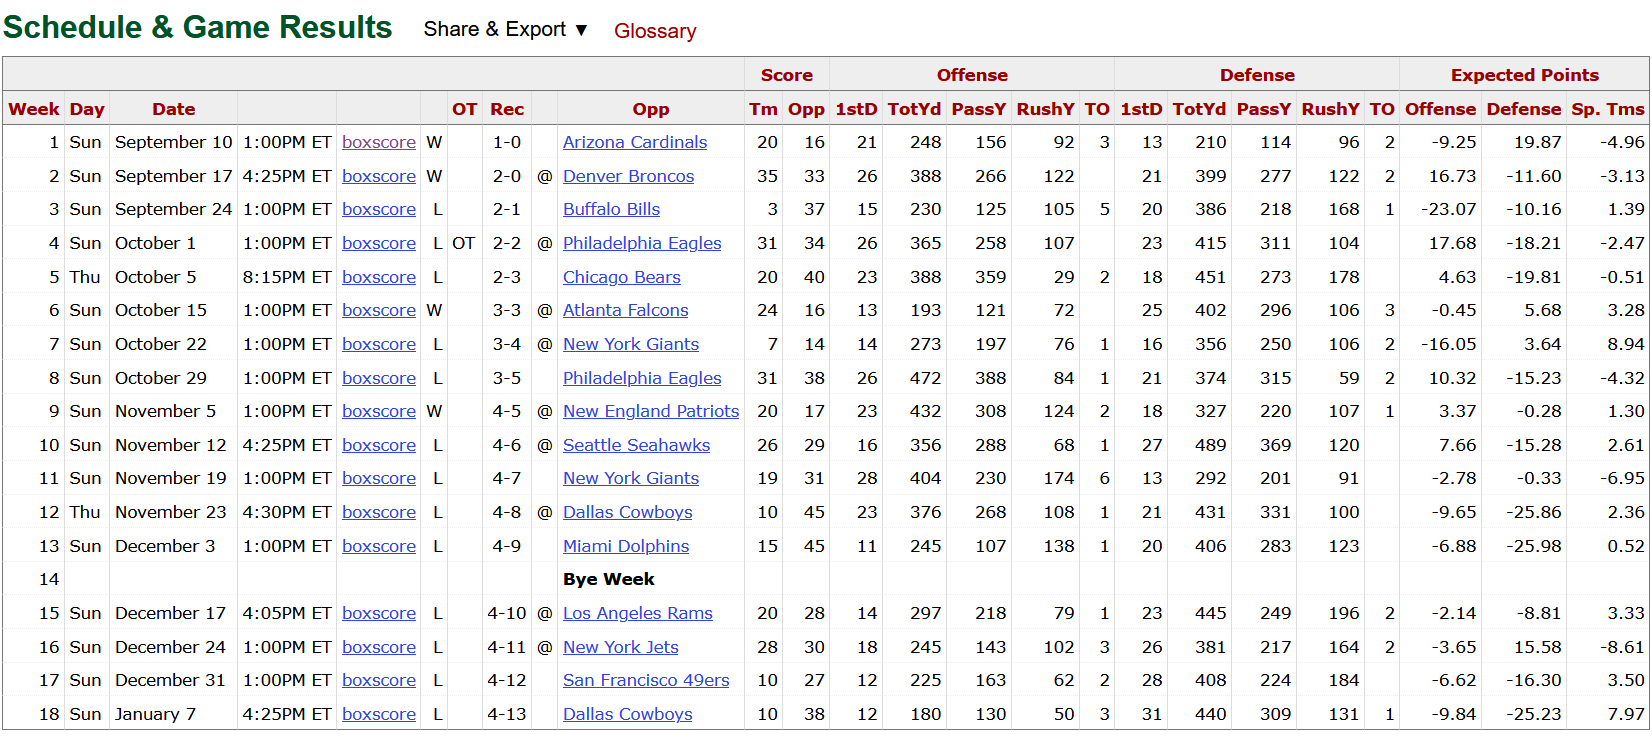
<figcaption aria-hidden="true">This is the table we are
after</figcaption>
</figure>

### Step 1: Retrieve the Game Data

First, we define our parameters (team and year), build the full URL,
read the HTML from the page, and then use `rvest` and `purrr` to extract
the specific table containing the game data we want.

In [ ]:
# ## EMPTY VERSION
# library(httr2)
# library(rvest)
# library(glue)
# library(purrr)
# 
# # Define team and year
# team_name <- "____"
# year <- ____
# 
# # Construct full URL
# generic_url <- glue("https://www.pro-football-reference.com/teams/{____}/{____}.htm#all_games")
# 
# # Read HTML page and extract tables
# webpage <- read_html(____)
# web_tables <- html_table(____)
# 
# # Pluck the second table (regular season games)
# game_table <- pluck(____, ____)

In [ ]:
## FILLED VERSION
library(httr2)
library(rvest)
library(glue)
library(purrr)

# Define team and year
team_name <- "was"
year <- 2023

# Construct full URL
generic_url <- glue("https://www.pro-football-reference.com/teams/{team_name}/{year}.htm#all_games")

# Read HTML page and extract tables
webpage <- read_html(generic_url)
web_tables <- html_table(webpage)

# Pluck the second table (regular season games)
game_table <- pluck(web_tables, 2)

------------------------------------------------------------------------

### Step 2: Clean the Column Headers

Scraped tables often have messy headers. The first row of this table
contains the real column names. We will extract that row, set it as the
new headers, remove the now-redundant first row, and finally use the
**`janitor`** package to standardize the names into a clean format.

**Note:** Sometimes we have to refer to base R syntax (like `colnames()`
and `[-1,]`) because modern `tidyverse` methods may not be the most
direct tool for a specific, low-level task like this.

In [ ]:
# ## EMPTY VERSION
# library(janitor)
# 
# # Use first row as column names
# firstrow_names <- ____[1, ] %>% 
#   unlist() %>% 
#   as.character()
# 
# # Assign as column names
# colnames(____) <- ____
# 
# # Remove the first row and clean names
# table_1 <- ____[-1, ]
# table_2 <- clean__names(____)

In [ ]:
## FILLED VERSION
library(janitor)

# Use first row as column names
firstrow_names <- game_table[1, ] %>% 
  unlist() %>% 
  as.character()

# Assign as column names
colnames(game_table) <- firstrow_names

# Remove the first row and clean names
table_1 <- game_table[-1, ]
# table_2 <- clean__names(table_1)

------------------------------------------------------------------------

### Step 3: Tidy and Transform the Data

The final step is to reshape the data into a truly usable format. This
involves renaming poorly named columns, removing irrelevant columns and
bye weeks, converting columns that look like numbers from text to
numeric, and correctly setting categorical variables (`factors`).

In [ ]:
# ## EMPTY VERSION
# library(dplyr)
# library(stringr)
# 
# # Rename, select, and filter
# table_4 <- table_2 %>% 
#   rename(
#     result = ____,
#     game_location = ____
#   ) %>% 
#   select(!(____:____)) %>% 
#   filter(opp != "____")
# 
# # Convert types
# table_6 <- table_4 %>%  
#   mutate(across(where(~ all(grepl("^\\s*-?\\d*\\.?\\d+\\s*$", .x))), ~ as.numeric(.))) %>% 
#   mutate(
#     result = as.factor(____),
#     game_location = case_when(
#       game_location == "@" ~ "____",
#       game_location == "" ~ "____",
#       TRUE ~ ____
#     ) %>% as.factor()
#   )
# 
# # Final column name cleanup
# final_games_df <- table_6 %>% 
#   rename_with(~ str_replace(., "^_", ""), .cols = starts_with("____"))

In [ ]:
## FILLED VERSION
library(dplyr)
library(stringr)

# Rename, select, and filter
table_4 <- table_2 %>% 
  rename(
    result = x_3,
    game_location = x_4
  ) %>% 
  select(!(x:x_2)) %>% 
  filter(opp != "Bye Week")

# Convert types
table_6 <- table_4 %>%  
  mutate(across(where(~ all(grepl("^\\s*-?\\d*\\.?\\d+\\s*$", .x))), ~ as.numeric(.))) %>% 
  mutate(
    result = as.factor(result),
    game_location = case_when(
      game_location == "@" ~ "away",
      game_location == "" ~ "home",
      TRUE ~ game_location
    ) %>%  as.factor()
  )

# Final column name cleanup
final_games_df <- table_6 %>% 
  rename_with(~ str_replace(., "^_", ""), .cols = starts_with("_"))